In [28]:
cd C:\Users\Syht\Documents\Stage_LNC\Python\StochPong

C:\Users\Syht\Documents\Stage_LNC\Python\StochPong


In [29]:
from __future__ import division, print_function
import os, matplotlib.pyplot as plt, numpy as np, pandas as pd, math
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline

282
337
392
508
532
562
598
692
755
938
998
1070
1139
1668
1859
1948
2295
2476
2636
2838
3361
3425
3492
Duration per level (in seconds) = [135.326]
Total duration = 2.26 min


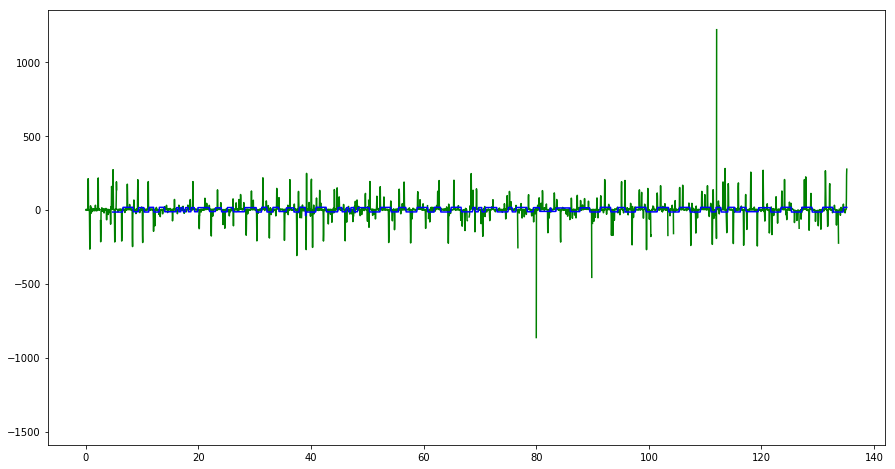

In [51]:
#subjects = ['remi', 'valerie', 'jade', 'juliette', 'elisa', 'maxime']
subjects = ['valerie']
t, x, y, duration, fig, grad = {}, {}, {}, [], [], []
dfs = {}

for subj in subjects:
    i = 1
    for file in os.listdir(os.path.join('datadir', 'pilot')):
        if file.endswith(".csv"):
            if subj in file:
                dfs['df%s%s' %(subj, i)] = pd.read_csv(os.path.join('datadir', 'pilot', file), '\t')
                i += 1

# The dataframes are in the variables named : key = df<subject_name><level_number> and stored in a dict
j = 0
for key, df in dfs.items():
    fig.append(fig)
    fig[j], ax = plt.subplots(figsize=(15,8))
    for obj, color in zip(['gaze', 'ball', 'paddle'], ['g', 'b', 'r']):
        if obj == 'gaze':
            t[obj], x[obj], y[obj] = df.loc[:,'Tgaze'], df.loc[:,'Xgaze'], df.loc[:,'Ygaze']
        if obj == 'ball':
            t[obj], x[obj], y[obj] = df.loc[:,'Tball'], df.loc[:,'Xball'], df.loc[:,'Yball']
        if obj == 'paddle':
            t[obj], x[obj], y[obj] = df.loc[:,'Tpaddle'], df.loc[:,'Xpaddle'], df.loc[:,'Ypaddle']
    j += 1

    duration.append(float(str(round(t['gaze'][len(t['gaze'])-1] - t['gaze'][0],3)))) # retrieve the lengths of the levels

    """ Gradients """
    N_start, N_stop = 0, int((t['gaze'][len(t['gaze'])-1] - t['gaze'][0])*30)
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['gaze'])[N_start:N_stop], 'g')
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['ball'])[N_start:N_stop], 'b')

    # find the moment when the ball collide with an element from below
    k = 0
    for w in np.gradient(y['ball'])[N_start:N_stop]:
        k += 1
        if w == 0:
            if np.gradient(y['ball'])[k-2] < 0:
                grad.append(k)
                print(k)
    #print('\n')
    
    break

print("Duration per level (in seconds) = " + str(duration))
print("Total duration = " + str(round(sum(duration)/60, 2)) + " min")

AttributeError: 'list' object has no attribute 'invert_yaxis'

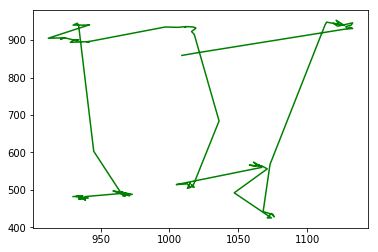

In [57]:
for v in grad:
    plt.plot(x['gaze'][v-50:v+50], y['gaze'][v-50:v+50], 'g').invert_yaxis()
    plt.plot(x['ball'][v-50:v+50], y['ball'][v-50:v+50], 'b').invert_yaxis()
    plt.plot(x['paddle'][v-50:v+50], y['paddle'][v-50:v+50], 'r').invert_yaxis()
    #plot.set_ylim(ax.get_ylim()[::-1]) # invert the y-axis